
<font color="red"><h1>CAC40 Stock Predicution</h1></font>
Reference: https://www.kaggle.com/datasets/bryanb/cac40-stocks-dataset?resource=download

## Summary:
CAC40, previously known as Bourse de Paris, is a benchmark French stock market index. The index represents a capitalization-weighted measure of the 40 most significant stocks among the 100 largest market caps on the Euronext Paris. Its acronym stands for Cotation Assistée en Continu, which translates to continuous assisted trading, and is used as a benchmark index for funds investing in the French stock market.

## Classroom Activity:
1. Perform preliminery analysis on the dataset and gain insights about it
2. Plot Model Fitting Performance by Training and Validation accuracy and discuss possibility of overfitting
3. Modify LSTM network architecture in the attempt to achieve better results
4. Do you think a wide and deep network can be implemented on LSTM?

### Context:
This notebook aims at showing a short script on how to predict stock prices using a LSTM model. An introduction has been made about Time Series Analysis, if you haven't read it yet, do not hesitate to give a look

### Reminder:
A Time Series is a time-indexed series of data. In Finance, a time series tracks the movement of the chosen data points, such as a security’s price, over a specified period of time with data points recorded at regular intervals.

### What is it used for?
Time series analysis can be useful to see how a given asset, security, or economic variable changes over time. It can also be used to examine how the changes associated with the chosen data point compare to shifts in other variables over the same time period.

For example, suppose you wanted to analyze a time series of daily closing stock prices for a given stock over a period of one year. You would obtain a list of all the closing prices for the stock from each day for the past year and list them in chronological order.

### 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

### 2. Pre-Processing

In [3]:
df = pd.read_csv('preprocessed_CAC40.csv', parse_dates=['Date'])

In [4]:
def load_data(company, start, end):
    dataframe = df.copy()
    dataframe = dataframe.loc[dataframe.Name == company, :]
    dataframe = dataframe.loc[(dataframe['Date'] > start) & (dataframe['Date'] < end), :]
    dataframe = dataframe.rename(columns = {'Closing_Price': 'Close'})
    return dataframe

In [5]:
COMPANY = 'Accor'
START_DATE = dt.datetime(2015,1,1)
END_DATE = dt.datetime(2020,1,1)

START_DATE_TEST = END_DATE

In [6]:
data = load_data(company = COMPANY,
                 start = START_DATE,
                 end = END_DATE)

In [7]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [8]:
# how many days do i want to base my predictions on ?
prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

### 3. Build LSTM Model

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. Introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work. They work tremendously well on a large variety of problems, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

All recurrent neural networks have the form of a chain of repeating modules of neural network.

In [9]:
def LSTM_model():
    
    model = Sequential()
    
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1))
    
    return model

### 4. Training

In [10]:
model = LSTM_model()
model.summary()
model.compile(optimizer='adam', 
              loss='mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [11]:
# Define callbacks

# Save weights only for best model
checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', 
                               verbose = 2, 
                               save_best_only = True)

model.fit(x_train, 
          y_train, 
          epochs=25, 
          batch_size = 32,
          callbacks = [checkpointer])

Epoch 1/25
38/38 [==============================] - ETA: 0s - loss: 0.0509

38/38 [==============================] - 9s 87ms/step - loss: 0.0509
Epoch 2/25
38/38 [==============================] - ETA: 0s - loss: 0.0108

38/38 [==============================] - 3s 86ms/step - loss: 0.0108
Epoch 3/25
38/38 [==============================] - ETA: 0s - loss: 0.0090

38/38 [==============================] - 3s 86ms/step - loss: 0.0090
Epoch 4/25
38/38 [==============================] - ETA: 0s - loss: 0.0083

38/38 [==============================] - 3s 85ms/step - loss: 0.0083
Epoch 5/25
38/38 [==============================] - ETA: 0s - loss: 0.0090

38/38 [==============================] - 3s 86ms/step - loss: 0.0090
Epoch 6/25
38/38 [==============================] - ETA: 0s - loss: 0.0081

38/38 [==============================] - 3s 85ms/step - loss: 0.0081
Epoch 7/25
38/38 [==============================] - ETA: 0s - loss: 0.0074

38/38 [==============================] - 3s 87ms/step - loss: 0.0074
Epoch 8/25
38/38 [==============================] - ETA: 0s - loss: 0.0074

38/38 [==============================] - 3s 84ms/step - loss: 0.0074
Epoch 9/25
38/38 [==============================] - ETA: 0s - loss: 0.0074

38/38 [==============================] - 3s 86ms/step - loss: 0.0074
Epoch 10/25
38/38 [==============================] - ETA: 0s - loss: 0.0074

38/38 [==============================] - 3s 86ms/step - loss: 0.0074
Epoch 11/25
38/38 [==============================] - ETA: 0s - loss: 0.0078

38/38 [==============================] - 3s 86ms/step - loss: 0.0078
Epoch 12/25
38/38 [==============================] - ETA: 0s - loss: 0.0076

38/38 [==============================] - 3s 86ms/step - loss: 0.0076
Epoch 13/25
38/38 [==============================] - ETA: 0s - loss: 0.0060

38/38 [==============================] - 3s 87ms/step - loss: 0.0060
Epoch 14/25
38/38 [==============================] - ETA: 0s - loss: 0.0061

38/38 [==============================] - 3s 86ms/step - loss: 0.0061
Epoch 15/25
38/38 [==============================] - ETA: 0s - loss: 0.0060

38/38 [==============================] - 3s 87ms/step - loss: 0.0060
Epoch 16/25
38/38 [==============================] - ETA: 0s - loss: 0.0067

38/38 [==============================] - 3s 87ms/step - loss: 0.0067
Epoch 17/25
38/38 [==============================] - ETA: 0s - loss: 0.0058

38/38 [==============================] - 3s 87ms/step - loss: 0.0058
Epoch 18/25
38/38 [==============================] - ETA: 0s - loss: 0.0060

38/38 [==============================] - 3s 88ms/step - loss: 0.0060
Epoch 19/25
38/38 [==============================] - ETA: 0s - loss: 0.0059

38/38 [==============================] - 3s 87ms/step - loss: 0.0059
Epoch 20/25
38/38 [==============================] - ETA: 0s - loss: 0.0053

38/38 [==============================] - 3s 85ms/step - loss: 0.0053
Epoch 21/25
38/38 [==============================] - ETA: 0s - loss: 0.0051

38/38 [==============================] - 3s 85ms/step - loss: 0.0051
Epoch 22/25
38/38 [==============================] - ETA: 0s - loss: 0.0053

38/38 [==============================] - 3s 86ms/step - loss: 0.0053
Epoch 23/25
38/38 [==============================] - ETA: 0s - loss: 0.0052

38/38 [==============================] - 3s 86ms/step - loss: 0.0052
Epoch 24/25
38/38 [==============================] - ETA: 0s - loss: 0.0051

38/38 [==============================] - 3s 85ms/step - loss: 0.0051
Epoch 25/25
38/38 [==============================] - ETA: 0s - loss: 0.0047

38/38 [==============================] - 3s 85ms/step - loss: 0.0047


### 5. Prediction

In [12]:
# test model accuracy on existing data
test_data = load_data(company = COMPANY,
                      start = START_DATE_TEST,
                      end = dt.datetime.now())

actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [13]:
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] ,1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

3/3 [==============================] - 1s 17ms/step


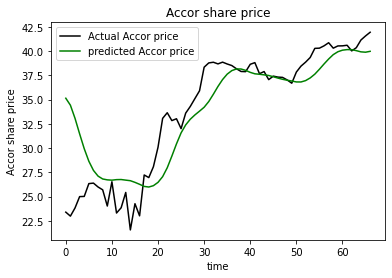

In [14]:
plt.plot(actual_prices, color='black', label=f"Actual {COMPANY} price")
plt.plot(predicted_prices, color= 'green', label=f"predicted {COMPANY} price")
plt.title(f"{COMPANY} share price")
plt.xlabel("time")
plt.ylabel(f"{COMPANY} share price")
plt.legend()
plt.show()

In [15]:
# predicting next day
real_data = [model_inputs[len(model_inputs)+1 - prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [16]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"prediction: {prediction}")

1/1 [==============================] - 1s 1s/step
prediction: [[40.179592]]


## Classroom Activity:

1. Perform preliminery analysis on the dataset and gain insights about it
2. Plot Model Fitting Performance by Training and Validation accuracy and discuss possibility of overfitting
3. Modify LSTM network architecture in the attempt to achieve better results
4. Do you think a wide and deep network can be implemented on LSTM?